In [25]:
#genetic algorithm implementation in python
# Experiment 3:
# Genetic Algorithm to optimize a mathematical function (do from Scratch)
# (1) Objective function f(x)= x**3 +9, here x is integer.
# (2) x must be represented in 6 digits of binary number.
# (3) Goal: to maximize the objective function.
# (4) Encoding Scheme is binary.
# (5) Size of population is 10.
# (6) Parent selection: Roulette Wheel selection
# (7) Single point crossover with probability 1
# (8) Mutation with probability 0.01
# (9) Survival Selection: Replace 20% worse solutions in children (Offspring) Population with
# 20% best solution in the parent population. 

In [26]:
def selection(new,old):
    new_int=[]
    old_int=[]
    selected=[]
    for i in range(10):
        new_int.append(int(new[i], 2))
        old_int.append(int(old[i], 2))
    old_int=sorted(old_int,reverse=True)
    new_int=sorted(new_int,reverse=True)
    for i in range(8):
        selected.append(bin(new_int[i])[2:].zfill(6))
    for i in range(2):
        selected.append(bin(old_int[i])[2:].zfill(6))
    random.shuffle(selected)
    return(selected)

In [27]:
#fitness function should quantitatively measure how fit a given solution is in solving the problem.
def fitness_function(population):
    y=[]                                #y=x**3+9
    for i in range(len(population)):
        y.append((int(population[i], 2))**3+9)
        
    y_avg=sum(y)/len(population)
    
    p_values=[]
    for i in range(len(y)):
        p_values.append(y[i]/sum(y))
    return p_values,y_avg

In [28]:
def crossover(parent1,parent2):
    #selecting a random point between 0-5 for crossover
    point=randint(1,5)
#     print(point)

    child1=parent1[:point]+parent2[point:]
    child2=parent2[:point]+parent1[point:]
    return child1,child2    

In [29]:
def mutation(children):
    #changing one bit randomly in one individual
    new_children=[]
    random_child=randint(0,9)
#     print(random_child)
    random_gene=randint(0,5)
#     print(random_gene)
    
    for i in range(len(children)):
        if i!=random_child:
            new_children.append(children[i])
        else:
            if(children[random_child][random_gene]=='1'):
                s='0'
            else:
                s='1'
            string=children[random_child][:random_gene]+s+children[random_child][random_gene+1:]
#             print(string)
            new_children.append(string)
        
        
        
    return new_children
        
    
    

In [30]:
max_generation=10000
N=10
target = '111111'

In [31]:
#initialization of population
#generating N random solutions
from random import randint
import random
import numpy as np
initial_population=[]
for i in range(N):
    initial_population.append(randint(0,45))
print(initial_population)

[19, 3, 34, 4, 2, 14, 1, 1, 21, 21]


In [32]:
#Encoding the solution
encoded_solution=[]
for i in range(len(initial_population)):
    encoded_solution.append(bin(initial_population[i])[2:].zfill(6))
    
print(encoded_solution)

['010011', '000011', '100010', '000100', '000010', '001110', '000001', '000001', '010101', '010101']


In [33]:
generation = 0
a=0
y_avg=[]
for i in range(10000):
    
    
    
    #calculating the fitness of the solutions
    p_values,y_average=fitness_function(encoded_solution)
    y_avg.append(y_average)
    
    
    #evaluating the solutions
    for j in range(len(encoded_solution)):
        print(f"{j}) {(int(encoded_solution[j], 2))}")
        if(encoded_solution[j]==target):
            a=1
        
    if(a==1):
        print(f"Converged at generation: {generation}")
        break
    print(f"Did not converged at generation: {generation}")
    
    

    
#     print(sum(p_values))
    
    #creating parents pool from current generation
    parents=list(np.random.choice(encoded_solution,10,p=p_values))
#     print(parents)
    
    #creating children pool by crossing over parents
    children=[]
    for k in range(5):
        c1,c2=crossover(parents[k],parents[9-k])
        children.append(c1)
        children.append(c2)
    
    generation=generation+1
        
    
#     print(children)
    mutate=randint(generation,generation+100)
#     print(mutate)
#     print(generation)
    if(generation==mutate):
        new_generation=mutation(children)
    else:
        new_generation=children
    
    #selection by Replacing 20% worse solutions in new_generation Population with 20% best solution in the parent population. 
    parent_generation=encoded_solution
    encoded_solution=selection(new_generation,parent_generation)
#     print(encoded_solution)
    
# print(y_avg)
    

0) 19
1) 3
2) 34
3) 4
4) 2
5) 14
6) 1
7) 1
8) 21
9) 21
Did not converged at generation: 0
0) 21
1) 37
2) 21
3) 22
4) 34
5) 34
6) 34
7) 34
8) 34
9) 33
Did not converged at generation: 1
0) 37
1) 37
2) 34
3) 34
4) 34
5) 34
6) 37
7) 37
8) 35
9) 36
Did not converged at generation: 2
0) 34
1) 34
2) 37
3) 38
4) 37
5) 37
6) 35
7) 35
8) 37
9) 36
Did not converged at generation: 3
0) 37
1) 35
2) 37
3) 37
4) 35
5) 37
6) 38
7) 37
8) 37
9) 35
Did not converged at generation: 4
0) 37
1) 37
2) 37
3) 37
4) 35
5) 37
6) 37
7) 38
8) 37
9) 38
Did not converged at generation: 5
0) 37
1) 37
2) 37
3) 38
4) 38
5) 37
6) 37
7) 37
8) 37
9) 37
Did not converged at generation: 6
0) 38
1) 37
2) 37
3) 37
4) 37
5) 37
6) 38
7) 37
8) 39
9) 37
Did not converged at generation: 7
0) 37
1) 37
2) 38
3) 38
4) 37
5) 39
6) 39
7) 38
8) 37
9) 37
Did not converged at generation: 8
0) 37
1) 37
2) 37
3) 37
4) 38
5) 39
6) 37
7) 37
8) 39
9) 39
Did not converged at generation: 9
0) 37
1) 37
2) 39
3) 37
4) 39
5) 39
6) 39
7) 37
8) 39
9

1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 156
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 157
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 158
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 159
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 160
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 161
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 162
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 163
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 164
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 165
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55


1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 323
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 324
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 325
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 326
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 327
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 328
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 329
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 330
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 331
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 332
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55


0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 484
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 485
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 486
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 487
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 488
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 489
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 490
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 491
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 492
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 493
0) 55
1) 55
2) 55
3) 55
4) 55


0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 599
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 600
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 601
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 602
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 603
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 604
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 605
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 606
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 607
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 608
0) 55
1) 55
2) 55
3) 55
4) 55


7) 55
8) 55
9) 55
Did not converged at generation: 727
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 728
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 729
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 730
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 731
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 732
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 733
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 734
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 735
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not converged at generation: 736
0) 55
1) 55
2) 55
3) 55
4) 55
5) 55
6) 55
7) 55
8) 55
9) 55
Did not conv

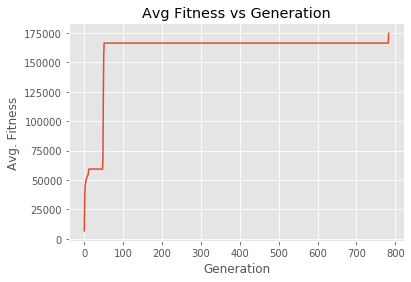

In [34]:
#Plotting the results onto a line graph, allowing us to observe 'The Generation vs Fitness'
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
# plt.scatter(range(0,generation+1), y_avg)
plt.plot(range(0,generation+1), y_avg)
plt.title('Avg Fitness vs Generation')
plt.xlabel('Generation')
plt.ylabel('Avg. Fitness') #within cluster sum of squares
plt.show()